<a href="https://colab.research.google.com/github/xiomara-udea/COMPETENCIA-AI4ENG-UDEA---Semestre-2025-1/blob/main/03_modelo_con_preprocesado_ffill_y_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"xiomaraperezudea","key":"c7779ed01610d092aea8f2d5f696098f"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 767MB/s]


In [ ]:
!unzip -l udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip

Archive:  udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
  4716673  2025-03-25 16:54   submission_example.csv
 59185250  2025-03-25 16:54   test.csv
143732449  2025-03-25 16:54   train.csv
---------                     -------
207634372                     3 files


In [ ]:
!unzip udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip

Archive:  udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
!ls -lash *.csv

4.5M -rw-r--r-- 1 root root 4.5M Mar 25 16:54 submission_example.csv
 57M -rw-r--r-- 1 root root  57M Mar 25 16:54 test.csv
138M -rw-r--r-- 1 root root 138M Mar 25 16:54 train.csv


In [ ]:
dtr = pd.read_csv("train.csv")
print (dtr.shape)

(692500, 21)


In [ ]:
dts = pd.read_csv("test.csv")
print (dts.shape)

(296786, 20)


In [ ]:
dtr.head(10)


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294
5,659872,20203,MEDICINA VETERINARIA,ANTIOQUIA,Más de 7 millones,Menos de 10 horas,Estrato 5,Si,Educación profesional completa,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,medio-alto,0.553,0.142,0.248,0.175
6,47159,20183,INGENIERIA MECANICA,HUILA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Educación profesional incompleta,Si,...,N,Si,Si,Si,Técnica o tecnológica completa,alto,0.242,0.299,0.267,0.308
7,11829,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Entre 11 y 20 horas,Estrato 2,Si,Primaria incompleta,Si,...,N,Si,No,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.238,0.316,0.286,0.290
8,257869,20212,INGENIERIA INDUSTRIAL,ATLANTICO,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 1,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Educación profesional incompleta,medio-bajo,0.147,0.407,0.212,0.328
9,465511,20183,ADMINISTRACION DE EMPRESAS,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 5,Si,Postgrado,Si,...,N,Si,Si,Si,Postgrado,alto,0.535,0.122,0.257,0.167


In [ ]:
dtr.columns

NameError: name 'dtr' is not defined

In [ ]:
# Ver en qué columnas hay nulos
dtr.isna().sum()[dtr.isna().sum() != 0]

,0
ESTU_VALORMATRICULAUNIVERSIDAD,6287
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,32137
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONPADRE,23178
FAMI_TIENELAVADORA,39773
FAMI_TIENEAUTOMOVIL,43623
ESTU_PAGOMATRICULAPROPIO,6498
FAMI_TIENECOMPUTADOR,38103
FAMI_TIENEINTERNET.1,26629


Text(0.5, 0, 'Características')

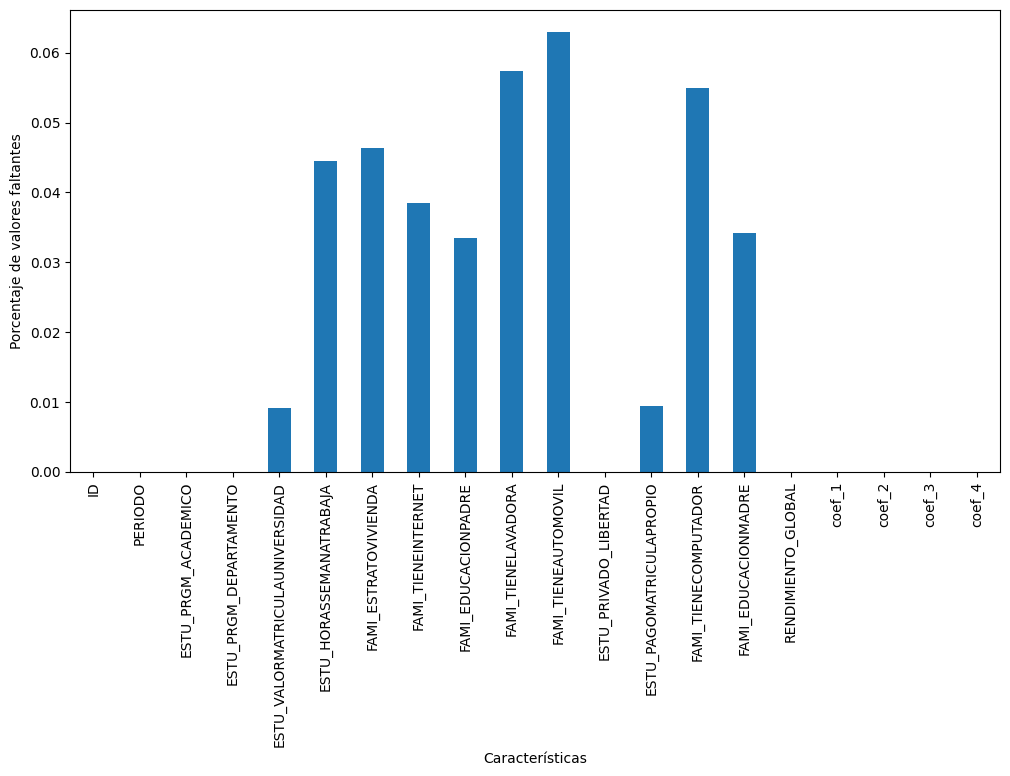

In [ ]:
dtr.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Porcentaje de valores faltantes')
plt.xlabel('Características')

In [ ]:
## KEEPOUTPUT
from local.lib import mlutils
k = dtr.isna().sum()
k[k!=0]

,0
ESTU_VALORMATRICULAUNIVERSIDAD,6287
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,32137
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONPADRE,23178
FAMI_TIENELAVADORA,39773
FAMI_TIENEAUTOMOVIL,43623
ESTU_PAGOMATRICULAPROPIO,6498
FAMI_TIENECOMPUTADOR,38103
FAMI_EDUCACIONMADRE,23664


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

class SaberProCleaner:
    def __init__(self):
        self.scaler = MinMaxScaler()
        self.columnas_onehot = ['PERIODO', 'ESTU_PRGM_DEPARTAMENTO', 'AREA_ACADEMICA']
        self.columns_after_onehot = None
        self.columnas_a_normalizar = ['ESTU_VALORMATRICULAUNIVERSIDAD_num', 'ESTU_HORASSEMANATRABAJA_num']

        self.mapa_valormatricula = {
            'Menos de 500 mil': 250_000,
            'Entre 500 mil y menos de 1 millón': 750_000,
            'Entre 1 millón y menos de 2.5 millones': 1_750_000,
            'Entre 2.5 millones y menos de 4 millones': 3_250_000,
            'Entre 4 millones y menos de 5.5 millones': 4_750_000,
            'Entre 5.5 millones y menos de 7 millones': 6_250_000,
            'Más de 7 millones': 8_000_000,
            'No pagó matrícula': 0
        }

        self.mapa_horas_trabajo = {
            '0': 0,
            'Menos de 10 horas': 5,
            'Entre 10 y 20 horas': 15,
            'Entre 21 y 30 horas': 25,
            'Más de 30 horas': 35
        }

        self.binarios_bool = {
            'FAMI_TIENEINTERNET': {'Si': True, 'No': False},
            'FAMI_TIENELAVADORA': {'Si': True, 'No': False},
            'FAMI_TIENEAUTOMOVIL': {'Si': True, 'No': False},
            'ESTU_PRIVADO_LIBERTAD': {'S': True, 'N': False},
            'ESTU_PAGOMATRICULAPROPIO': {'Si': True, 'No': False},
            'FAMI_TIENECOMPUTADOR': {'Si': True, 'No': False}
        }

        self.educacion_orden = {
            'Ninguno': 1,
            'Primaria incompleta': 2,
            'Primaria completa': 3,
            'Secundaria (Bachillerato) incompleta': 4,
            'Secundaria (Bachillerato) completa': 5,
            'Técnica o tecnológica incompleta': 6,
            'Técnica o tecnológica completa': 7,
            'Educación profesional incompleta': 8,
            'Educación profesional completa': 9,
            'Postgrado': 10
        }

        self.rendimiento_orden = {
            'bajo': 1,
            'medio-bajo': 2,
            'medio-alto': 3,
            'alto': 4
        }

    def limpiar_programa(self, texto):
        if pd.isnull(texto): return texto
        texto = texto.upper().strip()
        texto = (texto.replace('Á','A').replace('É','E').replace('Í','I')
                      .replace('Ó','O').replace('Ú','U').replace('Ñ','N')
                      .replace('¿','').replace('¡','').replace('.', '')
                      .replace('-', ' ').replace('_', ' '))
        while '  ' in texto:
            texto = texto.replace('  ', ' ')
        return texto

    def clasificar_area(self, programa):
        programa = programa.upper()
        if any(p in programa for p in ['INGENIERIA', 'INGENIERÍA']):
            return 'Ingenierías'
        elif any(p in programa for p in ['MEDICINA', 'ENFERMERIA', 'SALUD', 'FISIOTERAPIA', 'ODONTOLOGIA', 'NUTRICION', 'TERAPIA']):
            return 'Salud'
        elif any(p in programa for p in ['DERECHO']):
            return 'Derecho'
        elif any(p in programa for p in ['ADMINISTRACION', 'CONTADURIA', 'ECONOMIA']):
            return 'Económico-administrativas'
        elif any(p in programa for p in ['BIOLOGIA', 'FISICA', 'QUIMICA', 'MATEMATICA']):
            return 'Ciencias Básicas'
        elif any(p in programa for p in ['PSICOLOGIA', 'SOCIOLOGIA', 'TRABAJO SOCIAL']):
            return 'Ciencias Sociales y Humanas'
        elif any(p in programa for p in ['ARTES', 'DISEÑO', 'MUSICA']):
            return 'Artes'
        elif any(p in programa for p in ['LICENCIATURA', 'EDUCACION']):
            return 'Educación'
        elif any(p in programa for p in ['COMUNICACION']):
            return 'Comunicación'
        elif any(p in programa for p in ['AGRONOMIA', 'VETERINARIA']):
            return 'Agropecuarias y Medio Ambiente'
        else:
            return 'Otras'

    def fit_transform(self, df):
        return self._transform(df.copy(), fit_scaler=True)

    def transform(self, df):
        return self._transform(df.copy(), fit_scaler=False)

    def _transform(self, df, fit_scaler):
        # 1. Drop columna duplicada
        df = df.drop(columns=['FAMI_TIENEINTERNET.1'], errors='ignore')

        # 2. Mapeo ordinal
        df['ESTU_VALORMATRICULAUNIVERSIDAD_num'] = df['ESTU_VALORMATRICULAUNIVERSIDAD'].map(self.mapa_valormatricula)
        df['ESTU_HORASSEMANATRABAJA_num'] = df['ESTU_HORASSEMANATRABAJA'].map(self.mapa_horas_trabajo)
        df['ESTU_VALORMATRICULAUNIVERSIDAD_num'] = df['ESTU_VALORMATRICULAUNIVERSIDAD_num'].fillna(df['ESTU_VALORMATRICULAUNIVERSIDAD_num'].mean())
        df['ESTU_HORASSEMANATRABAJA_num'] = df['ESTU_HORASSEMANATRABAJA_num'].fillna(df['ESTU_HORASSEMANATRABAJA_num'].mean())

        # 3. Relleno por ffill
        columnas_ffill = [
            'FAMI_ESTRATOVIVIENDA',
            'FAMI_TIENEINTERNET',
            'FAMI_EDUCACIONPADRE',
            'FAMI_TIENELAVADORA',
            'FAMI_TIENEAUTOMOVIL',
            'ESTU_PAGOMATRICULAPROPIO',
            'FAMI_TIENECOMPUTADOR',
            'FAMI_EDUCACIONMADRE'
        ]
        for col in columnas_ffill:
            if col in df.columns:
                df[col] = df[col].ffill()

        # 4. Programa y área
        df['PROGRAMA_LIMPIO'] = df['ESTU_PRGM_ACADEMICO'].apply(self.limpiar_programa)
        df['AREA_ACADEMICA'] = df['PROGRAMA_LIMPIO'].apply(self.clasificar_area)
        df.drop(columns=['ESTU_PRGM_ACADEMICO', 'PROGRAMA_LIMPIO'], inplace=True)

        # 5. Mapear booleanos
        for col, mapping in self.binarios_bool.items():
            if col in df.columns:
                df[col] = df[col].map(mapping).astype(bool)

        # 6. Codificación ordinal
        for col in ['FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE']:
            df[col] = df[col].replace(['Ninguno', 'No sabe', 'No Aplica'], np.nan).ffill()
            df[col + '_ord'] = df[col].map(self.educacion_orden)

        if 'RENDIMIENTO_GLOBAL' in df.columns:
            df['RENDIMIENTO_GLOBAL_ord'] = df['RENDIMIENTO_GLOBAL'].map(self.rendimiento_orden)
            df.drop(columns=['RENDIMIENTO_GLOBAL'], inplace=True)

        df.drop(columns=[
            'FAMI_ESTRATOVIVIENDA',
            'FAMI_EDUCACIONPADRE',
            'FAMI_EDUCACIONMADRE',
            'ESTU_VALORMATRICULAUNIVERSIDAD',
            'ESTU_HORASSEMANATRABAJA'
        ], errors='ignore', inplace=True)

        # 7. One-hot
        df = pd.get_dummies(df, columns=self.columnas_onehot, dtype=bool)

        # Guardar columnas para usar en test
        if fit_scaler:
            self.columns_after_onehot = df.columns.tolist()

        # Asegurar columnas iguales en test
        if not fit_scaler:
            for col in self.columns_after_onehot:
                if col not in df:
                    df[col] = False
            df = df[self.columns_after_onehot]

        # 8. Escalar
        scaled = self.scaler.fit_transform(df[self.columnas_a_normalizar]) if fit_scaler else self.scaler.transform(df[self.columnas_a_normalizar])
        df_scaled = pd.DataFrame(scaled, columns=[c + '_scaled' for c in self.columnas_a_normalizar], index=df.index)
        df = pd.concat([df, df_scaled], axis=1)
        df.drop(columns=self.columnas_a_normalizar, inplace=True)

        return df


In [ ]:
import pandas as pd

# Cargar datos
#dtr = pd.read_csv("train.csv")
#dts = pd.read_csv("test.csv")

# Importar y usar clase limpiadora
cleaner = SaberProCleaner()
dtr_limpio = cleaner.fit_transform(dtr)
dts_limpio = cleaner.transform(dts)


In [ ]:
# La columna objetivo fue convertida en RENDIMIENTO_GLOBAL_ord (de 1 a 4)
Xtr = dtr_limpio.drop(columns=["RENDIMIENTO_GLOBAL_ord"]).values
ytr = dtr_limpio["RENDIMIENTO_GLOBAL_ord"].values

Xts = dts_limpio.values


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Entrenar y evaluar
modelo = RandomForestClassifier(random_state=42)
scores = cross_val_score(modelo, Xtr, ytr, cv=5, scoring='accuracy')
print("Accuracy promedio (CV 5):", scores.mean())


Accuracy promedio (CV 5): 0.3982483754512635


In [ ]:
# Entrenar modelo en todo el set de entrenamiento
modelo.fit(Xtr, ytr)

# Predecir sobre test
preds_ts = modelo.predict(Xts)


In [ ]:
# Diccionario inverso
inv_rendimiento_orden = {
    1: 'bajo',
    2: 'medio-bajo',
    3: 'medio-alto',
    4: 'alto'
}

preds_ts_labels = [inv_rendimiento_orden[p] for p in preds_ts]


In [ ]:
# Crear submission
submission = pd.DataFrame({
    'ID': dts['ID'],
    'RENDIMIENTO_GLOBAL': preds_ts_labels
})

# Guardar CSV
submission.to_csv("submission_saberpro.csv", index=False)
submission.head()
